Iteration 9: 100%|██████████████████████████████████████| 50/50 [00:00<00:00, 2173.33it/s, episode=500, return=-19.100]


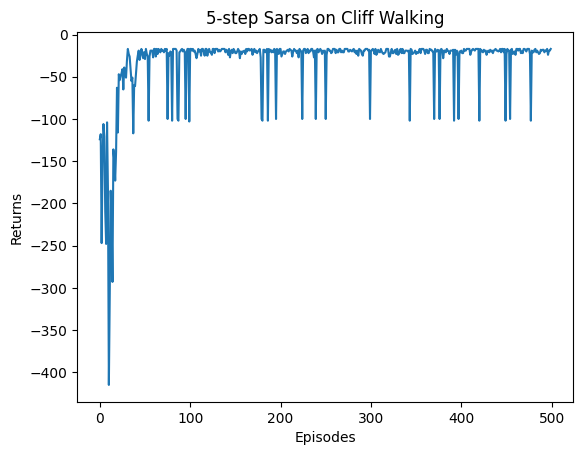

In [7]:
class nstep_Sarsa:
    """ n步Sarsa算法 """
    def __init__(self, n, ncol, nrow, epsilon, alpha, gamma, n_action=4):
        self.Q_table = np.zeros([nrow * ncol, n_action])  ## 实例化Q(s, a)表格
        self.n_action = n_action   ## 动作
        self.alpha = alpha         ## 给定α
        self.gamma = gamma         ## 给定γ
        self.epsilon = epsilon     ## 给定ε
        self.n = n  # 采用n步Sarsa算法
        self.state_list = []  # 保存之前的状态
        self.action_list = []  # 保存之前的动作
        self.reward_list = []  # 保存之前的奖励

    ## 获取当前采取的行动，采取了ε-贪婪策略
    def take_action(self, state):  # 选取下一步的操作,具体实现为epsilon-贪婪
        if np.random.random() < self.epsilon:           ##  随机选择一个动作
            action = np.random.randint(self.n_action)
        else:
            action = np.argmax(self.Q_table[state])     ##  拿到动作价值最大的动作
        return action

    ## 拿到每个状态最优的动作，最优动作标记1，其他的动作标记0
    def best_action(self, state):  # 用于打印策略
        Q_max = np.max(self.Q_table[state])
        a = [0 for _ in range(self.n_action)]
        for i in range(self.n_action):
            if self.Q_table[state, i] == Q_max:
                a[i] = 1
        return a

    ## 增量更新动作价值函数，对应相应的公式
    ## s0, a0是当前时间步的
    ## r, s1, a1是下一个时间步的，r是奖励，s1是状态，a1是动作
    def update(self, s0, a0, r, s1, a1, done):
        self.state_list.append(s0)   ##  当前状态s0加入到状态列表的
        self.action_list.append(a0)  ##  当前动作a0加入到动作列表的
        self.reward_list.append(r)   ##  当前状态采取的动作奖励，加入到奖励列表的
        if len(self.state_list) == self.n:  # 若保存的数据可以进行n步更新
            ## 拿到下一个时间步(s1, a1)对应的动作价值函数
            G = self.Q_table[s1, a1]  # 得到Q(s_{t+n}, a_{t+n})
            ## 逆序遍历奖励列表，算多步Sarsa algorithm公式括号内的非负部分
            for i in reversed(range(self.n)):
                G = self.gamma * G + self.reward_list[i]  # 不断向前计算每一步的回报
                # 如果到达终止状态,最后几步虽然长度不够n步,也将其进行更新
                if done and i > 0:
                    s = self.state_list[i] ## 拿出对应的状态
                    a = self.action_list[i]  ## 对应的动作
                    ## 多步sarsa，增量更新动作价值函数
                    self.Q_table[s, a] += self.alpha * (G - self.Q_table[s, a])
            ## 时间步往后移动，最开始的时间步内容需要删除才可以，状态、动作、奖励都需要删除
            ## 需要删除的时间步，也是需要更新的时间步，所以需要使用变量s, a来保存相应的内容以便使用
            s = self.state_list.pop(0)  # 将需要更新的状态动作从列表中删除,下次不必更新
            a = self.action_list.pop(0)
            self.reward_list.pop(0)
            # n步Sarsa的主要更新步骤
            self.Q_table[s, a] += self.alpha * (G - self.Q_table[s, a])  ## 增量更新动作价值函数
        if done:  # 如果到达终止状态,即将开始下一条序列,则将列表全清空
            self.state_list = []
            self.action_list = []
            self.reward_list = []


np.random.seed(0)
n_step = 5  # 5步Sarsa算法
alpha = 0.1
epsilon = 0.1
gamma = 0.9
agent = nstep_Sarsa(n_step, ncol, nrow, epsilon, alpha, gamma)
num_episodes = 500  # 智能体在环境中运行的序列的数量

return_list = []  # 记录每一条序列的回报
for i in range(10):  # 显示10个进度条
    #tqdm的进度条功能
    with tqdm(total=int(num_episodes / 10), desc='Iteration %d' % i) as pbar:
        for i_episode in range(int(num_episodes / 10)):  # 每个进度条的序列数
            episode_return = 0
            state = env.reset()
            action = agent.take_action(state)
            done = False
            while not done:
                next_state, reward, done = env.step(action)
                next_action = agent.take_action(next_state)
                episode_return += reward  # 这里回报的计算不进行折扣因子衰减
                agent.update(state, action, reward, next_state, next_action,
                             done)
                state = next_state
                action = next_action
            return_list.append(episode_return)
            if (i_episode + 1) % 10 == 0:  # 每10条序列打印一下这10条序列的平均回报
                pbar.set_postfix({
                    'episode':
                    '%d' % (num_episodes / 10 * i + i_episode + 1),
                    'return':
                    '%.3f' % np.mean(return_list[-10:])
                })
            pbar.update(1)

episodes_list = list(range(len(return_list)))
plt.plot(episodes_list, return_list)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('5-step Sarsa on {}'.format('Cliff Walking'))
plt.show()

# Iteration 0: 100%|██████████| 50/50 [00:00<00:00, 937.03it/s, episode=50,
# return=-26.500]
# Iteration 1: 100%|██████████| 50/50 [00:00<00:00, 2955.94it/s, episode=100,
# return=-35.200]
# Iteration 2: 100%|██████████| 50/50 [00:00<00:00, 2978.95it/s, episode=150,
# return=-20.100]
# Iteration 3: 100%|██████████| 50/50 [00:00<00:00, 3062.61it/s, episode=200,
# return=-27.200]
# Iteration 4: 100%|██████████| 50/50 [00:00<00:00, 3172.36it/s, episode=250,
# return=-19.300]
# Iteration 5: 100%|██████████| 50/50 [00:00<00:00, 3123.41it/s, episode=300,
# return=-27.400]
# Iteration 6: 100%|██████████| 50/50 [00:00<00:00, 2875.33it/s, episode=350,
# return=-28.000]
# Iteration 7: 100%|██████████| 50/50 [00:00<00:00, 2262.18it/s, episode=400,
# return=-36.500]
# Iteration 8: 100%|██████████| 50/50 [00:00<00:00, 3100.00it/s, episode=450,
# return=-27.000]
# Iteration 9: 100%|██████████| 50/50 [00:00<00:00, 3107.54it/s, episode=500,
# return=-19.100]

In [8]:
action_meaning = ['^', 'v', '<', '>']
print('5步Sarsa算法最终收敛得到的策略为：')
print_agent(agent, env, action_meaning, list(range(37, 47)), [47])

# 5步Sarsa算法最终收敛得到的策略为：
# ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ovoo
# ^ooo ^ooo ^ooo oo<o ^ooo ^ooo ^ooo ^ooo ooo> ooo> ^ooo ovoo
# ooo> ^ooo ^ooo ^ooo ^ooo ^ooo ^ooo ooo> ooo> ^ooo ooo> ovoo
# ^ooo **** **** **** **** **** **** **** **** **** **** EEEE

5步Sarsa算法最终收敛得到的策略为：
ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ovoo 
^ooo ^ooo ^ooo oo<o ^ooo ^ooo ^ooo ^ooo ooo> ooo> ^ooo ovoo 
ooo> ^ooo ^ooo ^ooo ^ooo ^ooo ^ooo ooo> ooo> ^ooo ooo> ovoo 
^ooo **** **** **** **** **** **** **** **** **** **** EEEE 


Iteration 9: 100%|██████████████████████████████████████| 50/50 [00:00<00:00, 2380.91it/s, episode=500, return=-61.700]


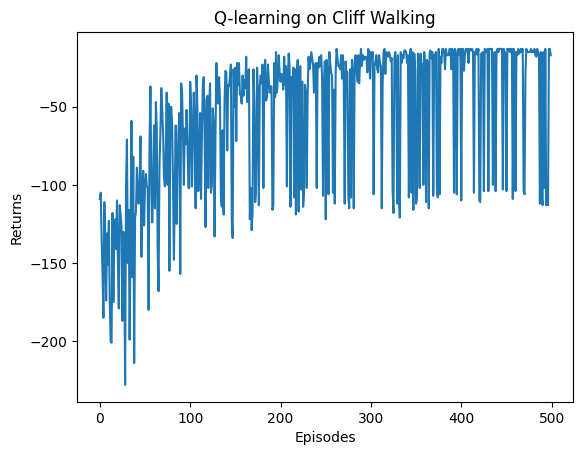

Q-learning算法最终收敛得到的策略为：
^ooo ovoo ovoo ^ooo ^ooo ovoo ooo> ^ooo ^ooo ooo> ooo> ovoo 
ooo> ooo> ooo> ooo> ooo> ooo> ^ooo ooo> ooo> ooo> ooo> ovoo 
ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ovoo 
^ooo **** **** **** **** **** **** **** **** **** **** EEEE 


In [9]:
class QLearning:
    """ Q-learning算法 """
    def __init__(self, ncol, nrow, epsilon, alpha, gamma, n_action=4):
        self.Q_table = np.zeros([nrow * ncol, n_action])  # 初始化Q(s,a)表格
        self.n_action = n_action  # 动作个数
        self.alpha = alpha  # 学习率
        self.gamma = gamma  # 折扣因子
        self.epsilon = epsilon  # epsilon-贪婪策略中的参数

        ## 获取当前采取的行动，采取了ε-贪婪策略
    def take_action(self, state):  # 选取下一步的操作,具体实现为epsilon-贪婪
        if np.random.random() < self.epsilon:           ##  随机选择一个动作
            action = np.random.randint(self.n_action)
        else:
            action = np.argmax(self.Q_table[state])     ##  拿到动作价值最大的动作
        return action

    ## 拿到每个状态最优的动作，最优动作标记1，其他的动作标记0
    def best_action(self, state):  # 用于打印策略
        Q_max = np.max(self.Q_table[state])
        a = [0 for _ in range(self.n_action)]
        for i in range(self.n_action):
            if self.Q_table[state, i] == Q_max:
                a[i] = 1
        return a

    '''
    增量更新动作价值函数，对应相应的Q-learning公式
    和sarsa algorithm不同的地方就是，这使用了状态内所有动作的最大值，但是sarsa直接使用了(s, a)状态动作对的值
    sarsa的公式就是：
    def update(self, s0, a0, r, s1, a1):
        td_error = r + self.gamma * self.Q_table[s1, a1] - self.Q_table[s0, a0]    ## 算时序差分的
        self.Q_table[s0, a0] += self.alpha * td_error      ##  更新动作价值函数
    '''
    def update(self, s0, a0, r, s1):
        td_error = r + self.gamma * self.Q_table[s1].max() - self.Q_table[s0, a0]
        self.Q_table[s0, a0] += self.alpha * td_error


np.random.seed(0)
epsilon = 0.1
alpha = 0.1
gamma = 0.9
agent = QLearning(ncol, nrow, epsilon, alpha, gamma)
num_episodes = 500  # 智能体在环境中运行的序列的数量

return_list = []  # 记录每一条序列的回报
for i in range(10):  # 显示10个进度条
    # tqdm的进度条功能
    with tqdm(total=int(num_episodes / 10), desc='Iteration %d' % i) as pbar:
        for i_episode in range(int(num_episodes / 10)):  # 每个进度条的序列数
            episode_return = 0
            state = env.reset()
            done = False
            while not done:
                action = agent.take_action(state)
                next_state, reward, done = env.step(action)
                episode_return += reward  # 这里回报的计算不进行折扣因子衰减
                agent.update(state, action, reward, next_state)
                state = next_state
            return_list.append(episode_return)
            if (i_episode + 1) % 10 == 0:  # 每10条序列打印一下这10条序列的平均回报
                pbar.set_postfix({
                    'episode':
                    '%d' % (num_episodes / 10 * i + i_episode + 1),
                    'return':
                    '%.3f' % np.mean(return_list[-10:])
                })
            pbar.update(1)

episodes_list = list(range(len(return_list)))
plt.plot(episodes_list, return_list)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('Q-learning on {}'.format('Cliff Walking'))
plt.show()

action_meaning = ['^', 'v', '<', '>']
print('Q-learning算法最终收敛得到的策略为：')
print_agent(agent, env, action_meaning, list(range(37, 47)), [47])

# Iteration 0: 100%|██████████| 50/50 [00:00<00:00, 1183.69it/s, episode=50,
# return=-105.700]
# Iteration 1: 100%|██████████| 50/50 [00:00<00:00, 1358.13it/s, episode=100,
# return=-70.900]
# Iteration 2: 100%|██████████| 50/50 [00:00<00:00, 1433.72it/s, episode=150,
# return=-56.500]
# Iteration 3: 100%|██████████| 50/50 [00:00<00:00, 2607.78it/s, episode=200,
# return=-46.500]
# Iteration 4: 100%|██████████| 50/50 [00:00<00:00, 3007.19it/s, episode=250,
# return=-40.800]
# Iteration 5: 100%|██████████| 50/50 [00:00<00:00, 2005.77it/s, episode=300,
# return=-20.400]
# Iteration 6: 100%|██████████| 50/50 [00:00<00:00, 2072.14it/s, episode=350,
# return=-45.700]
# Iteration 7: 100%|██████████| 50/50 [00:00<00:00, 4244.04it/s, episode=400,
# return=-32.800]
# Iteration 8: 100%|██████████| 50/50 [00:00<00:00, 4670.82it/s, episode=450,
# return=-22.700]
# Iteration 9: 100%|██████████| 50/50 [00:00<00:00, 4705.19it/s, episode=500,
# return=-61.700]

# Q-learning算法最终收敛得到的策略为：
# ^ooo ovoo ovoo ^ooo ^ooo ovoo ooo> ^ooo ^ooo ooo> ooo> ovoo
# ooo> ooo> ooo> ooo> ooo> ooo> ^ooo ooo> ooo> ooo> ooo> ovoo
# ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ovoo
# ^ooo **** **** **** **** **** **** **** **** **** **** EEEE